In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import random
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
import statistics
from scipy.special import logsumexp
from scipy.special import expm1

data = yf.download('BTC-USD', start = '2020-06-15', end = '2022-06-15')
data2 = yf.download('ETH-USD', start = '2020-06-15', end = '2022-06-15')
data3 = yf.download('BNB-USD', start = '2020-06-15', end = '2022-06-15')

Prices = pd.DataFrame(data['Adj Close'])
return_for_Prices = Prices.pct_change(1).dropna()
Prices2 = pd.DataFrame(data2['Adj Close'])
return_for_Prices2 = Prices2.pct_change(1).dropna()
Prices3 = pd.DataFrame(data3['Adj Close'])
return_for_Prices3 = Prices3.pct_change(1).dropna()
# days
N = len(Prices)
N2 = len(Prices2)
N3 = len(Prices3)

print(N3==N2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
True


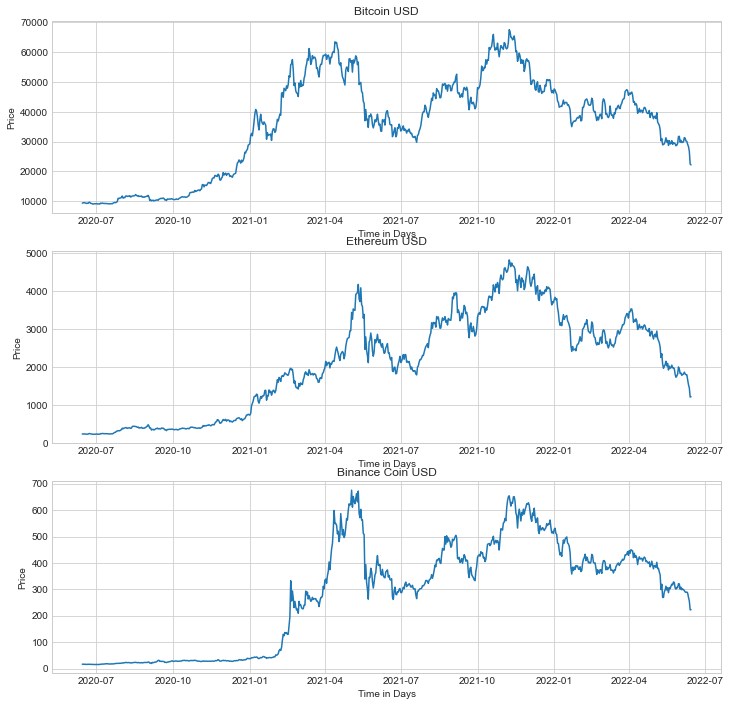

In [4]:
# Plot

fig = plt.figure()

plt.subplot(311)
plt.plot(Prices)
plt.title("Bitcoin USD")
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.subplot(312)
plt.plot(Prices2)
plt.title("Ethereum USD")
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.subplot(313)
plt.plot(Prices3)
plt.title("Binance Coin USD")
plt.xlabel('Time in Days')
plt.ylabel('Price')


fig.set_size_inches(12, 12)
fig.savefig('Price_BTC_ETH_BNB.pdf', format='pdf', dpi=1000)
fig.savefig('Price_BTC_ETH_BNB.eps', format='eps', dpi=1000)
plt.show()

In [5]:
sublen = len(return_for_Prices.loc['2020-06-15':'2021-06-15'])  # length of TRAINING window: 1y
t_per_sub = 1/sublen

# math -> np.float128

annualreturn = sublen * np.float128(return_for_Prices['Adj Close'].iloc[: sublen].mean())
annualrevola = np.sqrt(sublen) * np.float128(return_for_Prices['Adj Close'].iloc[: sublen].std())

S0 = np.float128(Prices['Adj Close'].iloc[sublen])
print('[Bitcoin]')
print('training window:', sublen, 'days')
print('mean:', annualreturn, ',std:', annualrevola)
print('initial price (test):', S0)

sublen2 = len(return_for_Prices2.loc['2020-06-15':'2021-06-15'])
t_per_sub2 = 1/sublen2

annualreturn2 = sublen2 * np.float128(return_for_Prices2['Adj Close'].iloc[: sublen2].mean())
annualrevola2 = np.sqrt(sublen2) * np.float128(return_for_Prices2['Adj Close'].iloc[: sublen2].std())

S02 = np.float128(Prices2['Adj Close'].iloc[sublen2])
print('[Ethereum]')
print('training window:', sublen2, 'days')
print('mean:', annualreturn2, ',std:', annualrevola2)
print('initial price (test):', S02)

sublen3 = len(return_for_Prices3.loc['2020-06-15':'2021-06-15'])
t_per_sub3 = 1/sublen3

annualreturn3 = sublen3 * np.float128(return_for_Prices3['Adj Close'].iloc[: sublen3].mean())
annualrevola3 = np.sqrt(sublen3) * np.float128(return_for_Prices3['Adj Close'].iloc[: sublen3].std())

S03 = np.float128(Prices3['Adj Close'].iloc[sublen3])
print('[Binance]')
print('training window:', sublen3, 'days')
print('mean:', annualreturn3, ',std:', annualrevola3)
print('initial price (test):', S03)

[Bitcoin]
training window: 366 days
mean: 1.7334218060501786016 ,std: 0.73943219604509270943
initial price (test): 40406.26953125
[Ethereum]
training window: 366 days
mean: 2.9505329651788485372 ,std: 1.0309178945359101014
initial price (test): 2610.936767578125
[Binance]
training window: 366 days
mean: 4.087551337968466262 ,std: 1.451596708495019723
initial price (test): 373.566162109375


In [9]:
# constraint set of gamma (historical: same bounds)

# Bitcoin

max_X = float(return_for_Prices.loc['2020-06-15':'2021-06-15'].max())
min_X = float(return_for_Prices.loc['2020-06-15':'2021-06-15'].min())
max_gamma = 1/abs(min_X)
min_gamma = -1/max_X
print('[Bitcoin]')
print(min_X, max_X)
print(min_gamma, max_gamma)

# Ethereum

max_X2 = float(return_for_Prices2.loc['2020-06-15':'2021-06-15'].max())
min_X2 = float(return_for_Prices2.loc['2020-06-15':'2021-06-15'].min())
max_gamma2 = 1/abs(min_X2)
min_gamma2 = -1/max_X2
print('[Ethereum]')
print(min_X2, max_X2)
print(min_gamma2, max_gamma2)

# Binance

max_X3 = float(return_for_Prices3.loc['2020-06-15':'2021-06-15'].max())
min_X3 = float(return_for_Prices3.loc['2020-06-15':'2021-06-15'].min())
max_gamma3 = 1/abs(min_X3)
min_gamma3 = -1/max_X3
print('[Binance]')
print(min_X3, max_X3)
print(min_gamma3, max_gamma3)

[Bitcoin]
-0.13766122609163733 0.18746473766529936
-5.334336539522466 7.2642095991091
[Ethereum]
-0.2720034941722024 0.2594753293956862
-3.8539309395193126 3.6764233600870995
[Binance]
-0.3326563093673738 0.6976040370570284
-1.4334779429010829 3.0061056166400126


In [7]:
x = np.random.uniform(0,1)
print(type(x))
x = np.float128(x)
print(type(x))

<class 'float'>
<class 'numpy.float128'>


In [8]:
def J_wo_gamma(gamma, stimu, max_d, V_start, S0, annualreturn, annualrevola, sublen):
    old_settings = np.seterr(all='warn')
    Ji_list = []
    max_V = V_start
    Vk = V_start
    sublen = int(sublen)
    for i in range(stimu):
        for t in range(sublen):
            x = random.gauss(mu = 0, sigma = 1)
            x = np.float128(x)
            mess1 = (annualreturn - ((annualrevola**2)/2))/sublen
            mess2 = annualrevola*x*np.sqrt(1/sublen)
            try:
                m1 = np.exp(mess1)
            except:
                m1 = 0
            try:
                m2 = np.exp(mess2)
            except:
                m2 = 0
            re = m1*m2 - 1
            dk = (max_V-Vk) / max_V
            try:
                Mk = (max_d-dk) / (1-dk)
            except:
                Mk = 0
            
            Vk1 = Vk * (1 + (gamma*Mk*re))
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen

In [12]:
# 生成500個區間內的gamma,模擬100次
# Bitcoin

r_list = []
Jr_list = []
for r in range(500):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0, annualreturn, annualrevola, sublen))

# Ethereum

r_list2 = []
Jr_list2 = []

for r in range(500):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去的資料
    r_list2.append(r)
    Jr_list2.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))

# Binance

r_list3 = []
Jr_list3 = []

for r in range(500):
    r = np.random.uniform(min_gamma3, max_gamma3)  # 代過去的資料
    r_list3.append(r)
    Jr_list3.append(J_wo_gamma(r, 100, 0.05, 10000, S03, annualreturn3, annualrevola3, sublen3))

/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/1095871058.py:24: RuntimeWarning: divide by zero encountered in longdouble_scalars
  Mk = (max_d-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/1095871058.py:28: RuntimeWarning: invalid value encountered in longdouble_scalars
  Vk1 = Vk * (1 + (gamma*Mk*re))


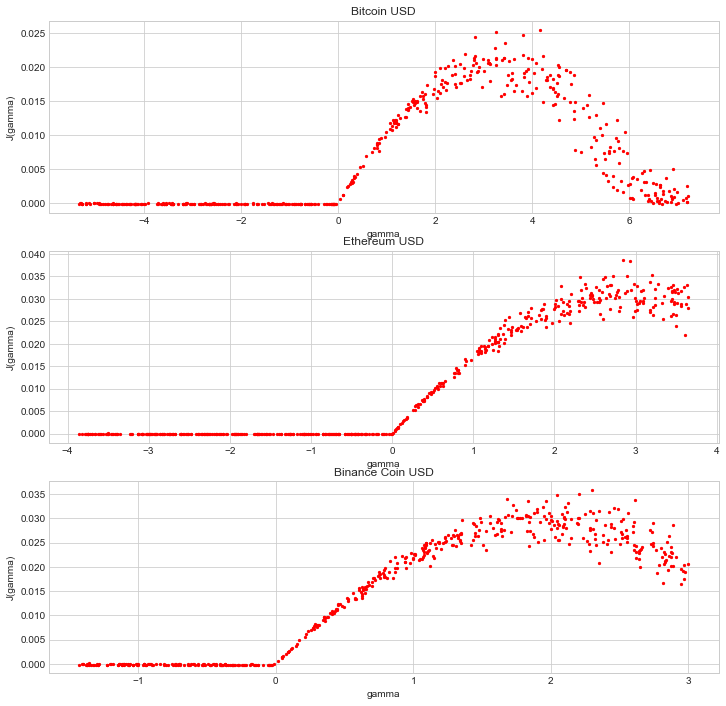

In [13]:
# Plot

fig = plt.figure()

plt.subplot(311)
plt.scatter(r_list, Jr_list, color='red', s=5)
plt.title("Bitcoin USD")
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")

plt.subplot(312)
plt.scatter(r_list2, Jr_list2, color='red', s=5)
plt.title("Ethereum USD")
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")

plt.subplot(313)
plt.scatter(r_list3, Jr_list3, color='red', s=5)
plt.title("Binance Coin USD")
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")

fig.set_size_inches(12, 12)
fig.savefig('gamma_BTC_ETH_BNB.pdf', format='pdf', dpi=1000)
fig.savefig('gamma_BTC_ETH_BNB.eps', format='eps', dpi=1000)
plt.show()

In [14]:
# 從模擬結果找最佳解
# Bitcoin

print('[Bitcoin]')
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

# Ethereum

print('[Ethereum]')
index2 = Jr_list2.index(max(Jr_list2))
print('max J(r) =', max(Jr_list2))
gamma_star2 = r_list2[index2]
print('gamma* = ', gamma_star2)

# Binance

print('[Binance]')
index3 = Jr_list3.index(max(Jr_list3))
print('max J(r) =', max(Jr_list3))
gamma_star3 = r_list3[index3]
print('gamma* = ', gamma_star3)

[Bitcoin]
max J(r) = 0.02547411674648613761
gamma* =  4.164146557359805
[Ethereum]
max J(r) = 0.038660739229424936947
gamma* =  2.8431261309750426
[Binance]
max J(r) = 0.0358336777790220115
gamma* =  2.2992255698255506


BTC avg return: 0.16708072759910192
ETH avg return: 0.2527687361735685


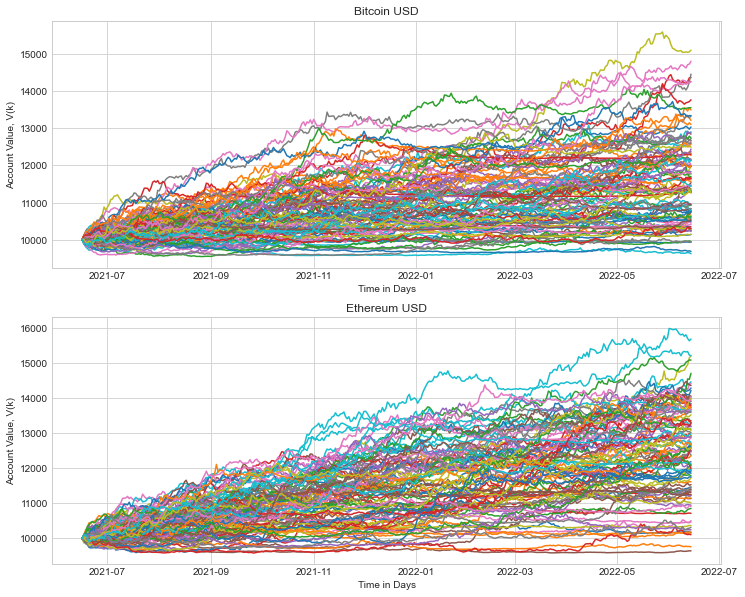

In [17]:
# Max Drawdown (gamma_star)
# Bitcoin

S0_pred = Prices['Adj Close'].loc['2021-06-16']
# S0_pred = Prices.iloc[new]['Adj Close']  # initial price
Vk_data = pd.DataFrame.copy(Prices.loc['2021-06-16':'2022-06-15'])
sublen_pred = len(return_for_Prices.loc['2021-06-16':'2022-06-15'])  # length of a window: 1y
column_names = []

Vks = 0
V_start = 10000  # initial value of the account
stimu_pre = 100  # number of path

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub 
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re = (S1-S0_pred) / S0_pred  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred = S1  # update the stock price
    Vks += Vk
    Vk_data.insert(i+1, column_names[-1], Vk_list) 

Vk_data = Vk_data.drop('Adj Close', axis=1)
print('BTC avg return:', (Vks/stimu_pre - V_start) / V_start)

# Ethereum

S0_pred2 = Prices2['Adj Close'].loc['2021-06-16']  # initial price
Vk_data2 = pd.DataFrame.copy(Prices2.loc['2021-06-16':'2022-06-15'])
sublen_pred2 = len(return_for_Prices2.loc['2021-06-16':'2022-06-15'])  # length of a window: 1y
column_names = []

Vks = 0

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred2-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn2 - ((annualrevola2**2)/2))*t_per_sub2
                      + (annualrevola2*x*math.sqrt(t_per_sub2))) * S0_pred2
        re = (S1-S0_pred2) / S0_pred2  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star2*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred2 = S1  # update the stock price
    Vks += Vk
    Vk_data2.insert(i+1, column_names[-1], Vk_list) 

Vk_data2 = Vk_data2.drop('Adj Close', axis=1)
print('ETH avg return:', (Vks/stimu_pre - V_start) / V_start)

# Plot

fig = plt.figure()

plt.subplot(211)
plt.plot(Vk_data)
plt.title("Bitcoin USD")
plt.xlabel("Time in Days") 
plt.ylabel("Account Value, V(k)")

plt.subplot(212)
plt.plot(Vk_data2)
plt.title("Ethereum USD")
plt.xlabel("Time in Days") 
plt.ylabel("Account Value, V(k)")

fig.set_size_inches(12, 10)
fig.savefig('DD_BTC_ETH_100.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_ETH_100.eps', format='eps', dpi=1000)
plt.show()

In [59]:
print(Prices2['Adj Close'].loc['2021-04-16'])

1.0023449659347534


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Portfolio avg return: 0.5096409413230658


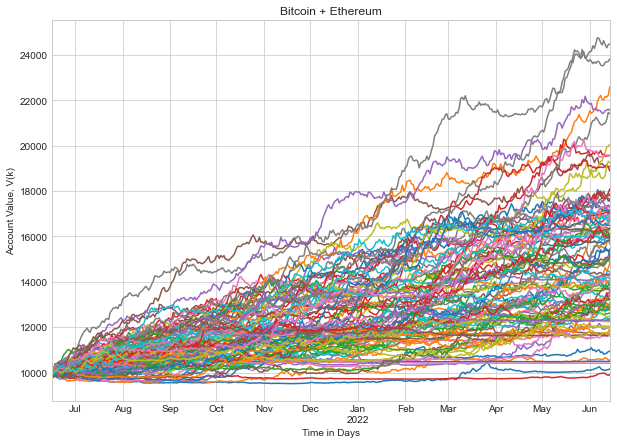

In [19]:
# Max Drawdown (gamma_star & gamma_star2)
# Portfolio

Vk_data_port = pd.DataFrame.copy(Prices2.loc['2021-06-16':'2022-06-15'])
column_names = []

Vks = 0

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):  # sublen_pred = sublen_pred2
        x = random.gauss(mu = 0, sigma = 1)
        y = random.gauss(mu = 0, sigma = 1)
        S1_1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re_1 = (S1_1-S0_pred) / S0_pred  # daily return: BTC
        S1_2 = math.exp((annualreturn2 - ((annualrevola2**2)/2))*t_per_sub2
                      + (annualrevola2*y*math.sqrt(t_per_sub2))) * S0_pred2
        re_2 = (S1_2-S0_pred2) / S0_pred2  # daily return: USDT
        
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star*Mk*re_1) + (gamma_star2*Mk*re_2))  # r + r2
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1
        S0_pred1 = S1_1
        S0_pred2 = S1_2
    Vks += Vk
    Vk_data_port.insert(i+1, column_names[-1], Vk_list) 

Vk_data_port = Vk_data_port.drop('Adj Close', axis=1)
print('Portfolio avg return:', (Vks/stimu_pre - V_start) / V_start)

Vk_data_port.plot(title = "Bitcoin + Ethereum", legend=None)
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_100.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_100.eps', format='eps', dpi=1000)
plt.show()

# Brief summary
# Gamma*

BTC: 3.0592135115317998 --> 3.06
ETH: 2.2288703880907588 --> 2.23

# Avg return

BTC: 0.16708072759910192 --> 16.71%
ETH: 0.2527687361735685 --> 25.28%
Portfolio: 0.5096409413230658 --> 50.96%

# restart strategy: |dmax - d(k)|< epsilon
# 注意dataframe的結構改變
要知道什麼時候撞到d_max
撞到 d_max後一個交易日進場 (從最後一天的帳戶餘額繼續)
用原來的gamma和他的上下界 (長期趨勢)

In [15]:
Prices_reset = Prices.reset_index()
print(Prices_reset)
Prices2_reset = Prices2.reset_index()
print(Prices2_reset)
Prices3_reset = Prices3.reset_index()
print(Prices3_reset)

          Date     Adj Close
0   2020-06-14   9386.788086
1   2020-06-15   9450.702148
2   2020-06-16   9538.024414
3   2020-06-17   9480.254883
4   2020-06-18   9411.840820
..         ...           ...
726 2022-06-10  29083.804688
727 2022-06-11  28360.810547
728 2022-06-12  26762.648438
729 2022-06-13  22487.388672
730 2022-06-14  22206.792969

[731 rows x 2 columns]
          Date    Adj Close
0   2020-06-14   234.114700
1   2020-06-15   229.928909
2   2020-06-16   234.416168
3   2020-06-17   233.028275
4   2020-06-18   232.101166
..         ...          ...
726 2022-06-10  1665.042236
727 2022-06-11  1529.663452
728 2022-06-12  1445.216553
729 2022-06-13  1204.582764
730 2022-06-14  1211.662842

[731 rows x 2 columns]
          Date   Adj Close
0   2020-06-14   16.656242
1   2020-06-15   16.384802
2   2020-06-16   16.421957
3   2020-06-17   16.402542
4   2020-06-18   16.208590
..         ...         ...
726 2022-06-10  286.046692
727 2022-06-11  269.487000
728 2022-06-12  255.95088

In [16]:
# length of testing window: 1y

Y2 = len(return_for_Prices.loc['2021-06-16':'2022-06-15'])
Y22 = len(return_for_Prices2.loc['2021-06-16':'2022-06-15'])
Y23 = len(return_for_Prices3.loc['2021-06-16':'2022-06-15'])

def GammaBound(t0, t1, data):
    '''t0, t1: string, data: dataframe'''
    # constraint set of gamma(t= t0~ t1)
    # print(t0, t1)
    
    max_Xt = data.loc[t0:t1].max()
    min_Xt = data.loc[t0:t1].min()
    max_gamma = 1/abs(float(min_Xt))
    min_gamma = -1/float(max_Xt)
    
    return max_gamma, min_gamma

# Y2_day0_index, Y2_day0_index2

In [17]:
Y2_day0_index = (Prices_reset.index[Prices_reset['Date'] == '2021-06-16']).tolist()
new = [i+1 for i in Y2_day0_index]
print('[Bitcoin]')
print(Prices_reset.iloc[Y2_day0_index])

Y2_day0_index2 = (Prices2_reset.index[Prices2_reset['Date'] == '2021-06-16']).tolist()
new2 = [i+1 for i in Y2_day0_index2]
print('[Ethereum]')
print(Prices2_reset.iloc[Y2_day0_index2])

Y2_day0_index3 = (Prices3_reset.index[Prices3_reset['Date'] == '2021-06-16']).tolist()
new3 = [i+1 for i in Y2_day0_index3]
print('[Binance]')
print(Prices3_reset.iloc[Y2_day0_index3])

[Bitcoin]
          Date   Adj Close
367 2021-06-16  38347.0625
[Ethereum]
          Date    Adj Close
367 2021-06-16  2367.663574
[Binance]
          Date   Adj Close
367 2021-06-16  347.033447


# Restart Functions

# Bitcoin

def Restart(t, t1, gamma, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    max_dk = 0
    hit = 0
    d_list = []
    t_index = (Prices.index[Prices['Date'] == t]).tolist()
    t1_index = (Prices.index[Prices['Date'] == t1]).tolist()
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]
    
    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        di = (max_Vi-Vi) / max_Vi
        
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        if di >= max_dk:
            max_dk = di  # update
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y2 - 1:
            Mi = (max_d-di) / (1-di)
            Vi_1 = Vi * (1 + (gamma*Mi*float(return_for_Prices.iloc[ith_day_length])))
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1
    return Vi_list, hit, d_list

# Ethereum

def Restart2(t, t1, gamma, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    max_dk = 0
    hit = 0
    d_list = []
    t_index = (Prices2_reset.index[Prices2_reset['Date'] == t]).tolist()
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]

    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        di = (max_Vi-Vi) / max_Vi
        
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        if di >= max_dk:
            max_dk = di  # update
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y22 - 1:
            Mi = (max_d-di) / (1-di)
            Vi_1 = Vi * (1 + (gamma*Mi*float(return_for_Prices2.iloc[ith_day_length])))
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1
    return Vi_list, hit, d_list

# 改過dmax, np.float128, etc

In [18]:
# Portfolio

def RestartP(t, t1, gamma, gamma2, gamma3, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    hit = 0
    d_list = []
    
    t_index = (Prices_reset.index[Prices_reset['Date'] == t]).tolist()  # 從哪期開始跑
    t1_index = (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()  # 跑到哪期
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]  # 兩個時間點的差距

    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        
        di = (max_Vi-Vi) / max_Vi
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        '''if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break'''
        if (dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y2 - 1:  # Y2 == Y22

            try:
                Mi = (dmax-di) / (1-di)
            except:
                Mi = 0

            Vi_1 = Vi * (1 + (gamma*Mi*np.float128(return_for_Prices.iloc[ith_day_length])
                              + (gamma2*Mi*np.float128(return_for_Prices2.iloc[ith_day_length])) 
                              + (gamma3*Mi*np.float128(return_for_Prices3.iloc[ith_day_length]))))
            if Vi_1 < 0:
                Vi_1 = 0
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1  # update the account value to the next (i-th) run
    return Vi_list, hit, d_list

In [19]:
# Portfolio

def J_wo_gamma_t0t1_P(t0, t1, gamma, gamma2, stimu, dmax, V_start):
    '''objective function, gammas as inputs, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start

    sublen_t0t1 = len(return_for_Prices.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    
    # BTC
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices_reset['Adj Close'][S0_list[0]]
    # ETH
    annualreturn_t0t1_2 = sublen_t0t1 * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1_2 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].std())
    S02_list = [i+1 for i in (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()]
    S02_t1 = Prices2_reset['Adj Close'][S02_list[0]]
    # BNB
    annualreturn_t0t1_3 = sublen_t0t1 * np.float128(return_for_Prices3['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1_3 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices3['Adj Close'].loc[t0:t1].std())
    S03_list = [i+1 for i in (Prices3_reset.index[Prices3_reset['Date'] == t1]).tolist()]
    S03_t1 = Prices3_reset['Adj Close'][S03_list[0]]    
        
    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            y = random.gauss(mu = 0, sigma = 1)  
            z = random.gauss(mu = 0, sigma = 1)  
            
            try:
                e_1 = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                          + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e_1 = 0
            re_1 = e_1 - 1
            try:
                e_2 = np.exp((annualreturn_t0t1_2 - ((annualrevola_t0t1_2**2)/2))*t_per_sub 
                          + (annualrevola_t0t1_2*y*np.sqrt(t_per_sub)))
            except:
                e_2 = 0
            re_2 = e_2 - 1
            try:
                e_3 = np.exp((annualreturn_t0t1_3 - ((annualrevola_t0t1_3**2)/2))*t_per_sub 
                          + (annualrevola_t0t1_3*y*np.sqrt(t_per_sub)))
            except:
                e_3 = 0
            re_3 = e_3 - 1
                        
            #S1_2 = math.exp((annualreturn_t0t1_2 - ((annualrevola_t0t1_2**2)/2))*t_per_sub 
            #              + (annualrevola_t0t1_2*y*math.sqrt(t_per_sub))) * S02_t1
            #re_2 = (S1_2-S02_t1) / S02_t1  # daily return: ETH   
            try:
                dk = (max_V-Vk) / max_V
            except:
                print('J_wo_gamma_t0t1_P')

            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re_1) + (gamma2*Mk*re_2) + (gamma3*Mk*re_3))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

In [20]:
# Bitcoin

def J_wo_gamma_t0t1(t0, t1, gamma, stimu, dmax, V_start):
    '''objective function, gamma as an input, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    
    sublen_t0t1 = len(return_for_Prices.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices_reset['Adj Close'][S0_list[0]]

    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            #S1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            #re = (S1-S0_t1) / S0_t1       
            try:
                e = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                              + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e = 0
            re = e - 1  # daily return
            #dk = (max_V-Vk) / max_V
            try:
                dk = (max_V-Vk) / max_V
            except:
                print('J_wo_gamma_t0t1')
            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

# Ethereum

def J_wo_gamma_t0t1_2(t0, t1, gamma, stimu, dmax, V_start):
    '''objective function, gamma as an input, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    
    sublen_t0t1 = len(return_for_Prices2.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices2_reset['Adj Close'][S0_list[0]]

    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            #S1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2)) * t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            #re = (S1-S0_t1) / S0_t1
            try:
                e = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                              + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e = 0
            re = e - 1  # daily return
            try:
                dk = (max_V-Vk) / max_V
            except:
                print('J_wo_gamma_t0t1_2')
            dk = (max_V-Vk) / max_V
            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

In [21]:
# Binance

def J_wo_gamma_t0t1_3(t0, t1, gamma, stimu, dmax, V_start):
    '''objective function, gamma as an input, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    
    sublen_t0t1 = len(return_for_Prices3.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices3['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices3['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices3_reset.index[Prices3_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices3_reset['Adj Close'][S0_list[0]]

    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            #S1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2)) * t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            #re = (S1-S0_t1) / S0_t1
            try:
                e = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                              + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e = 0
            re = e - 1  # daily return
            try:
                dk = (max_V-Vk) / max_V
            except:
                print('J_wo_gamma_t0t1_2')
            dk = (max_V-Vk) / max_V
            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

# GetGamma functions

def GetGamma(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices_reset['Date'][t1_1_index[0]])[:10]
    
    max_gamma, min_gamma = GammaBound(t0, T1, return_for_Prices)
    r_list = []
    Jr_list = []
    for r in range(1000):
        r = np.random.uniform(min_gamma, max_gamma)
        r_list.append(r)
        Jr_list.append(J_wo_gamma_t0t1(t0, T1, r, 1000, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    return max(Jr_list), gamma_star

def GetGamma2(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices2_reset['Date'][t1_1_index[0]])[:10]
    
    max_gamma, min_gamma = GammaBound(t0, T1, return_for_Prices2)
    r_list = []
    Jr_list = []
    for r in range(1000):
        r = np.random.uniform(min_gamma, max_gamma)
        r_list.append(r)
        Jr_list.append(J_wo_gamma_t0t1_2(t0, T1, r, 1000, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    return max(Jr_list), gamma_star

# 要改？？？
the constraint on γ as follows: |Xmin| γ+ − Xmax γ− ≤ 1
γi− =. min{γi, 0}; γi+ =. max{γi, 0}.

In [33]:
def GammaBoundP(t0, t1, data, data2, data3):
    '''t0, t1: string, data: dataframe'''
    # constraint set of gamma(t= t0~ t1)
    
    max_Xt = data.loc[t0:t1].max()
    min_Xt = data.loc[t0:t1].min()
    max_gamma = 1/abs(np.float64(min_Xt))
    min_gamma = -1/np.float64(max_Xt)
    
    max_Xt2 = data2.loc[t0:t1].max()
    min_Xt2 = data2.loc[t0:t1].min()
    max_gamma2 = 1/abs(np.float64(min_Xt2))
    min_gamma2 = -1/np.float64(max_Xt2)
    
    max_Xt3 = data3.loc[t0:t1].max()
    min_Xt3 = data3.loc[t0:t1].min()
    max_gamma3 = 1/abs(np.float64(min_Xt3))
    min_gamma3 = -1/np.float64(max_Xt3)    
    return max_gamma, min_gamma, max_gamma2, min_gamma2, max_gamma3, min_gamma3

In [34]:
def GetGammaP(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices2_reset['Date'][t1_1_index[0]])[:10]
    
    max_r, min_r, max_r2, min_r2, max_r3, min_r3 = GammaBoundP(t0, T1, return_for_Prices, 
                                                               return_for_Prices2, return_for_Prices3)
    r_list = []
    r2_list = []
    r3_list = []
    Jr3_list = []
    Jr_list = []
    Jr2_list = []
    for i in range(300):
        r = np.random.uniform(min_r, max_r)
        r2 = np.random.uniform(min_r2, max_r2)
        r3 = np.random.uniform(min_r3, max_r3)
        r = np.float64(r)
        r2 = np.float64(r2)
        r3 = np.float64(r3)
        r_list.append(r)
        r2_list.append(r2)
        r3_list.append(r3)        
        Jr_list.append(J_wo_gamma_t0t1(t0, T1, r, 100, dmax, V_start))
        Jr2_list.append(J_wo_gamma_t0t1_2(t0, T1, r2, 100, dmax, V_start))
        Jr3_list.append(J_wo_gamma_t0t1_3(t0, T1, r3, 100, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    index2 = Jr2_list.index(max(Jr2_list))
    gamma_star2 = r2_list[index2]
    index3 = Jr3_list.index(max(Jr3_list))
    gamma_star3 = r3_list[index3]
    return max(Jr_list), gamma_star, max(Jr2_list), gamma_star2, max(Jr3_list), gamma_star3

# 一季

# Bitcoin
# 改成restart日和前一季算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去1 y的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0, annualreturn, annualrevola, sublen))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

# Ethereum
# 改成restart日和前一季算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去1 y的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star2 = r_list[index]
print('gamma* = ', gamma_star2)

# 用GetGammaP找t0~t1間股價推得個別最佳gamma*

In [25]:
# Portfolio
# 改成restart日和前一季算出來的gamma

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
r2_list = []
Jr2_list = []
r3_list = []
Jr3_list = []

for r in range(500):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去1 y的資料
    r2 = np.random.uniform(min_gamma2, max_gamma2)
    r3 = np.random.uniform(min_gamma3, max_gamma3)    
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0, annualreturn, annualrevola, sublen))
    r2_list.append(r2)
    Jr2_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))
    r3_list.append(r3)
    Jr3_list.append(J_wo_gamma(r, 100, 0.05, 10000, S03, annualreturn3, annualrevola3, sublen3))


print('[Bitcoin]')
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

print('[Ethereum]')
index2 = Jr2_list.index(max(Jr2_list))
print('max J(r) =', max(Jr2_list))
gamma_star2 = r2_list[index2]
print('gamma* = ', gamma_star2)

print('[Binance]')
index3 = Jr3_list.index(max(Jr3_list))
print('max J(r) =', max(Jr3_list))
gamma_star3 = r3_list[index3]
print('gamma* = ', gamma_star3)

/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/1095871058.py:24: RuntimeWarning: divide by zero encountered in longdouble_scalars
  Mk = (max_d-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/1095871058.py:28: RuntimeWarning: invalid value encountered in longdouble_scalars
  Vk1 = Vk * (1 + (gamma*Mk*re))


[Bitcoin]
max J(r) = 0.025257830480388624176
gamma* =  3.4308104946548212
[Ethereum]
max J(r) = 0.036293649252874689918
gamma* =  -0.5065774806067247
[Binance]
max J(r) = 0.03360297751592385425
gamma* =  1.2634887114285251


In [35]:
# Portfolio

c = 0  # 算跑幾輪

ep = 0.001
max_d = 0.05

V_start = 10000
V_all1 = [V_start]  # 使用策略

hits1 = ['2021-06-16']
d_list1 = [0]  # collection of drawdowns

while len(V_all1) < Y2:  # 前提 Y2 == Y22!!
    hits1_last_index = (Prices_reset.index[Prices_reset['Date'] == hits1[-1]]).tolist()
    hits1_last_delta_index = [i-delta for i in hits1_last_index]
    H1 = str(Prices_reset['Date'][hits1_last_delta_index[0]])[:10]
    print(H1, hits1[-1])  # updated training window
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
        
    else:
        ri_1 = GetGammaP(H1, hits1[-1], max_d, V_all1[-1])[1]
        ri_2 = GetGammaP(H1, hits1[-1], max_d, V_all1[-1])[3]
        ri_3 = GetGammaP(H1, hits1[-1], max_d, V_all1[-1])[5]

        
    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits1[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all1[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all1 += Vi_list[1:]
    d_list1 += di_list[1:]
    
    print('最大跌幅(使用策略):', max(d_list1), d_list1.index(max(d_list1)))
    print('帳戶餘額:', V_all1[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print('撞到限制的期數(使用策略):', hittime)
        hits1.append(hittime)
    c += 1
    print(c)

hits1 = hits1[1:]
print('=========================================')
print('帳戶餘額跑', len(V_all1), '輪')
print('撞到限制的期數彙整(使用策略):', hits1)

2021-03-17 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247
最大跌幅(使用策略): [0.04894752] 324
帳戶餘額: [10029.19191983]
撞到限制的期數(使用策略): 2022-05-07
1
2022-02-05 2022-05-07
gammas: -2.08666322651474 -3.224532036176827
最大跌幅(使用策略): [0.04894752] 324
帳戶餘額: [9695.84060927]
2
帳戶餘額跑 364 輪
撞到限制的期數彙整(使用策略): ['2022-05-07']


In [36]:
for i in range(len(V_all1)):
    V_all1[i] = float(V_all1[i])
    V_all1[i] = math.floor(V_all1[i] * 10000) / 10000.0
print(V_all1[1:3], V_all1[-3: -1])

[9996.7895, 9881.8225] [9708.9893, 9691.0638]


In [37]:
for i in range(len(d_list1)):
    d_list1[i] = float(d_list1[i])
print(max(d_list1), min(d_list1))

0.048947518622845104 0.0


In [38]:
# Portfolio

c_ori1 = 0  # 算跑幾輪

V_start = 10000
V_ori1 = [V_start]  # 原股價走勢（gamma = 1) -> for comparison

hits1_ori = ['2021-06-16']
d_list_ori = [0]  # collection of drawdowns

while len(V_ori1) < Y2:  # 前提 Y2 == Y22!!
    hits1_ori_last_index = (Prices_reset.index[Prices_reset['Date'] == hits1_ori[-1]]).tolist()
    hits1_ori_last_delta_index = [i-delta for i in hits1_ori_last_index]
    H1_ori = str(Prices_reset['Date'][hits1_ori_last_delta_index[0]])[:10]
    print(H1_ori, hits1_ori[-1])  # updated training window

    Vi_list_ori, hit_ori, di_list_ori = RestartP(hits1_ori[-1], '2022-06-14', 1, 1, 1, max_d, ep, V_ori1[-1])
    
    V_ori1 += Vi_list_ori[1:]
    d_list_ori += di_list_ori[1:]
    
    print('最大跌幅(gamma = 1):', max(d_list_ori), d_list_ori.index(max(d_list_ori)))
    if hit_ori != 0 and hit_ori <= N:  # 前提 N == N2!!
        hittime_ori = str(Prices_reset['Date'][hit_ori])[:10]
        print('撞到限制的期數(gamma = 1):', hittime_ori)
        hits1_ori.append(hittime_ori)
    c_ori1 += 1
    print(c_ori1)

hits1_ori = hits1_ori[1:]
print('=========================================')

print('帳戶餘額跑', len(V_ori1), '輪')
print('撞到限制的期數彙整(gamma = 1):', hits1_ori)

2021-03-17 2021-06-16
最大跌幅(gamma = 1): [0.04885509] 360
撞到限制的期數(gamma = 1): 2022-06-12
1
2022-03-13 2022-06-12
最大跌幅(gamma = 1): [0.04885509] 360
2
帳戶餘額跑 364 輪
撞到限制的期數彙整(gamma = 1): ['2022-06-12']


In [39]:
for i in range(len(V_ori1)):
    V_ori1[i] = float(V_ori1[i])
    V_ori1[i] = math.floor(V_ori1[i] * 10000) / 10000.0
print(V_ori1[1:3], V_ori1[-3: -1])

[10005.3083, 9923.3411] [10134.535, 9903.0009]


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
          Date    Restart
726 2022-06-10  9748.6069
727 2022-06-11  9723.7257
728 2022-06-12  9708.9893
729 2022-06-13  9691.0638
730 2022-06-14  9695.8406
最後一天的帳戶餘額: 9695.8406
Return: -0.030415940000000048
SD: 191.86275919012616
Sharpe Ratio: -0.0030245533459876328


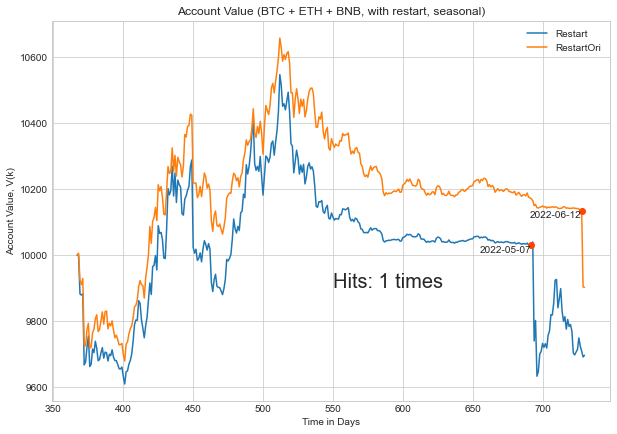

In [74]:
# Portfolio

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

Vk_data_ori_1 = pd.DataFrame()
Vk_data_ori_1 = Vk_data_ori_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_ori_1 = Vk_data_ori_1.assign(RestartOri = V_ori1)

print(Vk_data_re_1.head(5))
print(Vk_data_re_1.tail(5))

print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', (return_quarter/sd_quarter) * math.sqrt(Y2))

Vk_data_re_1['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, seasonal)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')

a = 'Hits: ' + str(len(hits1)) + ' times'
plt.text(550, 9900, a, fontsize = 20)

for a in hits1:
    hits1_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_day_index = hits1_day_index_l[0]
    plt.text(hits1_day_index, Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_day_index, Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

In [41]:
for a in hits1:
    hits1_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_day_index = hits1_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|



# 半年

In [43]:
# Portfolio

delta = int(Y2 / 2)  # 自訂為half year
c = 0
V_start = 10000
V_all2 = [V_start]
hits2 = ['2021-06-16']
d_list2 = [0]

while len(V_all2) < Y2:  # 前提 Y2 == Y22!!
    hits2_last_index = (Prices_reset.index[Prices_reset['Date'] == hits2[-1]]).tolist()
    hits2_last_delta_index = [i-delta for i in hits2_last_index]
    H1 = str(Prices_reset['Date'][hits2_last_delta_index[0]])[:10]
    print(H1, hits2[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
    else:
        ri_1 = GetGammaP(H1, hits2[-1], max_d, V_all2[-1])[1]
        ri_2 = GetGammaP(H1, hits2[-1], max_d, V_all2[-1])[3]
        ri_3 = GetGammaP(H1, hits2[-1], max_d, V_all2[-1])[5]

    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits2[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all2[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all2 += Vi_list[1:]
    d_list2 += di_list[1:]
    print('最大跌幅:', max(d_list2), d_list2.index(max(d_list2)))
    print('帳戶餘額:', V_all2[-1])

    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits2.append(hittime)
    c += 1
    print(c)

hits2 = hits2[1:]
print(len(V_all2))
print('撞到限制的期數:', hits2)

2020-12-16 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247 1.2634887114285251
最大跌幅: [0.04894752] 324
帳戶餘額: [10029.19191983]
2022-05-07
1
2021-11-06 2022-05-07


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/3646476738.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/3646476738.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))


gammas: -3.0412053498406237 -1.620449906395673 -2.222334975132089
最大跌幅: [0.04894752] 324
帳戶餘額: [11084.2962805]
2
364
撞到限制的期數: ['2022-05-07']


In [44]:
for i in range(len(V_all2)):
    V_all2[i] = float(V_all2[i])
    V_all2[i] = math.floor(V_all2[i] * 10000) / 10000.0
print(V_all2[1:3], V_all2[-3: -1])

[9996.7895, 9881.8225] [10637.9149, 11072.5164]


In [45]:
for i in range(len(d_list2)):
    d_list2[i] = float(d_list2[i])
print(max(d_list2), min(d_list2))

0.048947518622845104 0.0


# Portfolio

c_ori2 = 0  # 算跑幾輪

V_start = 10000
V_ori2 = [V_start]  # 原股價走勢（gamma = 1) -> for comparison

hits2_ori = ['2021-06-16']
d_list_ori = [0]  # collection of drawdowns

while len(V_ori2) < Y2:  # 前提 Y2 == Y22!!
    hits2_ori_last_index = (Prices_reset.index[Prices_reset['Date'] == hits2_ori[-1]]).tolist()
    hits2_ori_last_delta_index = [i-delta for i in hits2_ori_last_index]
    H1_ori = str(Prices_reset['Date'][hits2_ori_last_delta_index[0]])[:10]
    print(H1_ori, hits2_ori[-1])  # updated training window

    Vi_list_ori, hit_ori, di_list_ori = RestartP(hits2_ori[-1], '2022-06-14', 1, 1, max_d, ep, V_ori2[-1])
    
    V_ori2 += Vi_list_ori[1:]
    d_list_ori += di_list_ori[1:]
    
    print('最大跌幅(gamma = 1):', max(d_list_ori), d_list_ori.index(max(d_list_ori)))
    if hit_ori != 0 and hit_ori <= N:  # 前提 N == N2!!
        hittime_ori = str(Prices_reset['Date'][hit_ori])[:10]
        print('撞到限制的期數(gamma = 1):', hittime_ori)
        hits2_ori.append(hittime_ori)
    c_ori2 += 1
    print(c_ori2)

hits2_ori = hits2_ori[1:]
print('=========================================')

print('帳戶餘額跑', len(V_ori2), '輪')
print('撞到限制的期數彙整(gamma = 1):', hits2_ori)

          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
          Date     Restart
726 2022-06-10  10449.0259
727 2022-06-11  10525.1619
728 2022-06-12  10637.9149
729 2022-06-13  11072.5164
730 2022-06-14  11084.2962
最後一天的帳戶餘額: 11084.2962
Return: 0.10842962000000007
SD: 226.6180461456684
Sharpe Ratio: 0.009128599144858529


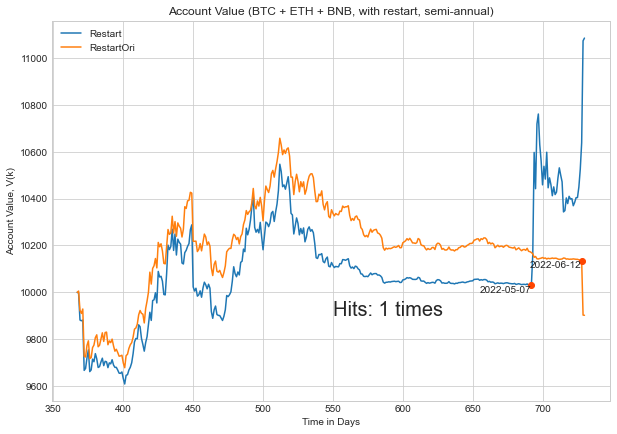

In [75]:
# Portfolio

Vk_data_re_2 = pd.DataFrame()
Vk_data_re_2 = Vk_data_re_2.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_2 = Vk_data_re_2.assign(Restart = V_all2)

print(Vk_data_re_2.head(5))
print(Vk_data_re_2.tail(5))

print('最後一天的帳戶餘額:', V_all2[-1])
return_quarter = (V_all2[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_2['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', (return_quarter/sd_quarter) * math.sqrt(Y2))

Vk_data_re_2['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, semi-annual)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits2)) + ' times'
plt.text(550, 9900, a, fontsize = 20)

for a in hits2:
    hits2_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits2_day_index = hits2_day_index_l[0]
    plt.text(hits2_day_index, Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits2_day_index, Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_semi_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_semi_0.05.eps', format='eps', dpi=1000)
plt.show()

In [47]:
for a in hits2:
    hits2_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits2_day_index = hits2_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|



# 一月

In [48]:
# Portfolio

ep = 0.001
max_d = 0.05
delta = int(Y2 / 12)  # monthly
c = 0
V_start = 10000
V_all3 = [V_start]
hits3 = ['2021-06-16']
d_list3 = [0]

while len(V_all3) < Y2:  # 前提 Y2 == Y22!!
    hits3_last_index = (Prices_reset.index[Prices_reset['Date'] == hits3[-1]]).tolist()
    hits3_last_delta_index = [i-delta for i in hits3_last_index]
    H1 = str(Prices_reset['Date'][hits3_last_delta_index[0]])[:10]
    print(H1, hits3[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
    else:
        ri_1 = GetGammaP(H1, hits3[-1], max_d, V_all3[-1])[1]
        ri_2 = GetGammaP(H1, hits3[-1], max_d, V_all3[-1])[3]
        ri_3 = GetGammaP(H1, hits3[-1], max_d, V_all3[-1])[5]
        
    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits3[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all3[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all3 += Vi_list[1:]
    d_list3 += di_list[1:]
    print('最大跌幅:', max(d_list3), d_list3.index(max(d_list3)))
    print('帳戶餘額:', V_all3[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits3.append(hittime)
    c += 1
    print(c)

hits3 = hits3[1:]
print(len(V_all3))
print('撞到限制的期數:', hits3)

2021-05-17 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247 1.2634887114285251
最大跌幅: [0.04894752] 324
帳戶餘額: [10029.19191983]
2022-05-07
1
2022-04-07 2022-05-07


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -7.24223130749451 -6.0652361189204385 -4.4574774712996295
最大跌幅: [0.04894752] 324
帳戶餘額: [10919.86964482]
2022-05-19
2
2022-04-19 2022-05-19


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -8.023058553837163 -5.786080473542512 -6.119517660449662
最大跌幅: [0.04894752] 324
帳戶餘額: [10528.08267978]
2022-05-30
3
2022-04-30 2022-05-30
gammas: -5.504584449159477 -5.3149839327961335 -2.1729213559335516
最大跌幅: [0.04894752] 324
帳戶餘額: [13274.06206337]
4
364
撞到限制的期數: ['2022-05-07', '2022-05-19', '2022-05-30']


In [49]:
for i in range(len(V_all3)):
    V_all3[i] = float(V_all3[i])
    V_all3[i] = math.floor(V_all3[i] * 10000) / 10000.0
print(V_all3[1:3], V_all3[-3: -1])

[9996.7895, 9881.8225] [12022.6156, 13253.8769]


In [50]:
for i in range(len(d_list3)):
    d_list3[i] = float(d_list3[i])
print(max(d_list3), min(d_list3))

0.048947518622845104 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
372 2021-06-21   9667.0665
373 2021-06-22   9675.5309
374 2021-06-23   9720.3166
375 2021-06-24   9754.5897
376 2021-06-25   9661.8093
          Date     Restart
721 2022-06-05  11006.1073
722 2022-06-06  10812.1216
723 2022-06-07  10870.8272
724 2022-06-08  10953.6074
725 2022-06-09  10962.1571
726 2022-06-10  11219.1617
727 2022-06-11  11608.9014
728 2022-06-12  12022.6156
729 2022-06-13  13253.8769
730 2022-06-14  13274.0620
最後一天的帳戶餘額: 13274.062
Return: 0.3274062
SD: 421.1257339594133
Sharpe Ratio: 0.014832891166753426


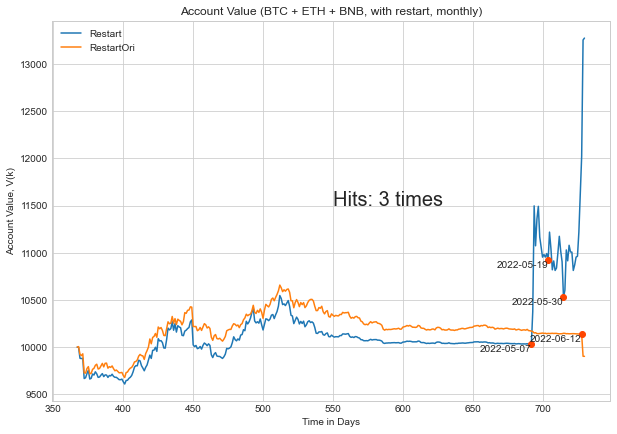

In [54]:
# Portfolio

Vk_data_re_3 = pd.DataFrame()
Vk_data_re_3 = Vk_data_re_3.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_3 = Vk_data_re_3.assign(Restart = V_all3)

print(Vk_data_re_3.head(10))
print(Vk_data_re_3.tail(10))

print('最後一天的帳戶餘額:', V_all3[-1])
return_month = (V_all3[-1]-V_start) / V_start
print('Return:', return_month)
sd_month = float(Vk_data_re_3['Restart'].std())
print('SD:', sd_month)
print('Sharpe Ratio:', (return_month/sd_month) * math.sqrt(Y2))

Vk_data_re_3['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, monthly)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits3)) + ' times'
plt.text(550, 11500, a, fontsize = 20)

for a in hits3:
    hits3_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits3_day_index = hits3_day_index_l[0]
    plt.text(hits3_day_index, Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits3_day_index, Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')

fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_month_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_month_0.05.eps', format='eps', dpi=1000)
plt.show()

In [55]:
for a in hits3:
    hits3_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits3_day_index = hits3_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|

2022-05-19
-7 10912.87|-6 10913.87|-5 10914.87|-4 10915.87|-3 10916.87|-2 10917.87|-1 10918.87|0 10919.87|1 10920.87|2 10921.87|3 10922.87|4 10923.87|5 10924.87|6 10925.87|7 10926.87|

2022-05-30
-7 10521.08|-6 10522.08|-5 10523.08|-4 10524.08|-3 10525.08|-2 10526.08|-1 10527.08|0 10528.08|1 10529.08|2 10530.08|3 10531.08|4 10532.08|5 10533.08|6 10534.08|7 10535.08|



# 兩週

In [56]:
# Portfolio

delta = 14  # 14 days
c = 0
V_start = 10000
V_all4 = [V_start]
hits4 = ['2021-06-16']
d_list4 = [0]
ep = 0.001
max_d = 0.05

while len(V_all4) < Y2:  # 前提 Y2 == Y22!!
    hits4_last_index = (Prices_reset.index[Prices_reset['Date'] == hits4[-1]]).tolist()
    hits4_last_delta_index = [i-delta for i in hits4_last_index]
    H1 = str(Prices_reset['Date'][hits4_last_delta_index[0]])[:10]
    print(H1, hits4[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
    else:
        ri_1 = GetGammaP(H1, hits4[-1], max_d, V_all4[-1])[1]
        ri_2 = GetGammaP(H1, hits4[-1], max_d, V_all4[-1])[3]
        ri_3 = GetGammaP(H1, hits4[-1], max_d, V_all4[-1])[5]
    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits4[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all4[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all4 += Vi_list[1:]
    d_list4 += di_list[1:]
    print('最大跌幅:', max(d_list4), d_list4.index(max(d_list4)))
    print('帳戶餘額:', V_all4[-1])

    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits4.append(hittime)
    c += 1
    print(c)

hits4 = hits4[1:]
print(len(V_all4))
print('撞到限制的期數:', hits4)

2021-06-02 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247 1.2634887114285251
最大跌幅: [0.04894752] 324
帳戶餘額: [10029.19191983]
2022-05-07
1
2022-04-23 2022-05-07


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/3646476738.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/3646476738.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -9.035724857667185 -5.164838997815156 -6.572842340945693
最大跌幅: [0.04894752] 324
帳戶餘額: [11188.48573145]
2022-05-15
2
2022-05-01 2022-05-15
gammas: -6.281024324659711 -3.831566312535797 -3.935937474065959
最大跌幅: [0.04894752] 324
帳戶餘額: [11113.39283026]
2022-05-30
3
2022-05-16 2022-05-30
gammas: -4.136778001841515 -7.7306726646569 -6.03598302133339
最大跌幅: [0.04894752] 324
帳戶餘額: [15352.37256625]
4
364
撞到限制的期數: ['2022-05-07', '2022-05-15', '2022-05-30']


In [57]:
for i in range(len(V_all4)):
    V_all4[i] = float(V_all4[i])
    V_all4[i] = math.floor(V_all4[i] * 10000) / 10000.0
print(V_all4[1:3], V_all4[-3: -1])

[9996.7895, 9881.8225] [13513.397, 15362.5336]


In [58]:
for i in range(len(d_list4)):
    d_list4[i] = float(d_list4[i])
print(max(d_list4), min(d_list4))

0.048947518622845104 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
372 2021-06-21   9667.0665
373 2021-06-22   9675.5309
374 2021-06-23   9720.3166
375 2021-06-24   9754.5897
376 2021-06-25   9661.8093
          Date     Restart
721 2022-06-05  11812.3822
722 2022-06-06  11634.3506
723 2022-06-07  11734.3957
724 2022-06-08  11836.8310
725 2022-06-09  11838.3251
726 2022-06-10  12231.5634
727 2022-06-11  12892.5710
728 2022-06-12  13513.3970
729 2022-06-13  15362.5336
730 2022-06-14  15352.3725
最後一天的帳戶餘額: 15352.3725
Return: 0.53523725
SD: 632.601646032658
Sharpe Ratio: 0.01614234797002862


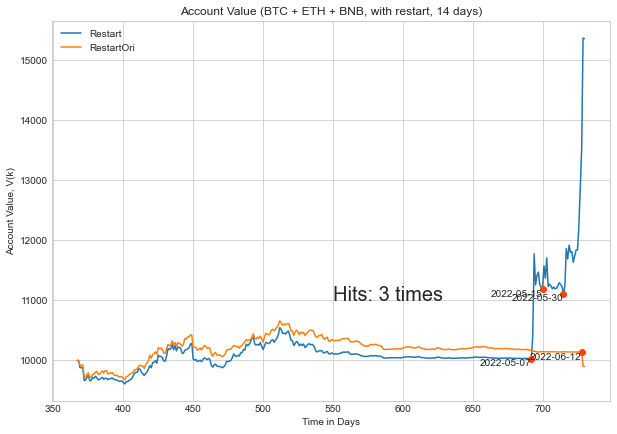

In [61]:
# Portfolio

Vk_data_re_4 = pd.DataFrame()
Vk_data_re_4 = Vk_data_re_4.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_4 = Vk_data_re_4.assign(Restart = V_all4)

print(Vk_data_re_4.head(10))
print(Vk_data_re_4.tail(10))

print('最後一天的帳戶餘額:', V_all4[-1])
return_14 = (V_all4[-1]-V_start) / V_start
print('Return:', return_14)
sd_14 = float(Vk_data_re_4['Restart'].std())
print('SD:', sd_14)
print('Sharpe Ratio:', (return_14/sd_14) * math.sqrt(Y2))

Vk_data_re_4['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, 14 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits4)) + ' times'
plt.text(550, 11000, a, fontsize = 20)

for a in hits4:
    hits4_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits4_day_index = hits4_day_index_l[0]
    plt.text(hits4_day_index, Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits4_day_index, Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_14d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_14d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [62]:
for a in hits4:
    hits4_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits4_day_index = hits4_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|

2022-05-15
-7 11181.49|-6 11182.49|-5 11183.49|-4 11184.49|-3 11185.49|-2 11186.49|-1 11187.49|0 11188.49|1 11189.49|2 11190.49|3 11191.49|4 11192.49|5 11193.49|6 11194.49|7 11195.49|

2022-05-30
-7 11106.39|-6 11107.39|-5 11108.39|-4 11109.39|-3 11110.39|-2 11111.39|-1 11112.39|0 11113.39|1 11114.39|2 11115.39|3 11116.39|4 11117.39|5 11118.39|6 11119.39|7 11120.39|



# 10天

In [63]:
# Portfolio

delta = 10  # 10 days
c = 0
V_start = 10000
V_all5 = [V_start]
hits5 = ['2021-06-16']
d_list5 = [0]
ep = 0.001
max_d = 0.05

while len(V_all5) < Y2:  # 前提 Y2 == Y22!!
    hits5_last_index = (Prices_reset.index[Prices_reset['Date'] == hits5[-1]]).tolist()
    hits5_last_delta_index = [i-delta for i in hits5_last_index]
    H1 = str(Prices_reset['Date'][hits5_last_delta_index[0]])[:10]
    print(H1, hits5[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
    else:
        ri_1 = GetGammaP(H1, hits5[-1], max_d, V_all5[-1])[1]
        ri_2 = GetGammaP(H1, hits5[-1], max_d, V_all5[-1])[3]
        ri_3 = GetGammaP(H1, hits5[-1], max_d, V_all5[-1])[5]
        
    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits5[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all5[-1])    
    V_all5 += Vi_list[1:]
    d_list5 += di_list[1:]
    print('最大跌幅:', max(d_list5), d_list5.index(max(d_list5)))
    print('帳戶餘額:', V_all5[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits5.append(hittime)
    c += 1
    print(c)

hits5 = hits5[1:]
print(len(V_all5))
print('撞到限制的期數:', hits5)

2021-06-06 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247 1.2634887114285251
最大跌幅: [0.04894752] 324
帳戶餘額: [10029.19191983]
2022-05-07
1
2022-04-27 2022-05-07


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -6.112231516421247 -10.08578726246123 -3.8766652266215758
最大跌幅: [0.04894752] 324
帳戶餘額: [11103.14961355]
2022-05-15
2
2022-05-05 2022-05-15


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -35.26024862123443 -13.71887164640934 -3.3057201040093105
最大跌幅: [0.04894752] 324
帳戶餘額: [11764.39870782]
2022-05-17
3
2022-05-07 2022-05-17
gammas: -7.7073508765765695 -5.3660147784176 -11.34309953106035
最大跌幅: [0.04894752] 324
帳戶餘額: [11748.62210835]
2022-05-19
4
2022-05-09 2022-05-19
gammas: -21.622876734465443 -5.216139852603966 -3.2907214568774688
最大跌幅: [0.04894752] 324
帳戶餘額: [11666.1188847]
2022-05-30
5
2022-05-20 2022-05-30
gammas: -29.746989797212894 -12.838510158888166 -17.128408345281883
最大跌幅: [0.04894752] 324
帳戶餘額: [13252.39782568]
2022-06-02
6
2022-05-23 2022-06-02
gammas: 10.440474496250825 -3.828552814939984 -18.13036798123081
最大跌幅: [0.04894752] 324
帳戶餘額: [15908.30651398]
7
364
撞到限制的期數: ['2022-05-07', '2022-05-15', '2022-05-17', '2022-05-19', '2022-05-30', '2022-06-02']


In [64]:
for i in range(len(V_all5)):
    V_all5[i] = float(V_all5[i])
    V_all5[i] = math.floor(V_all5[i] * 10000) / 10000.0
print(V_all5[1:3], V_all5[-3: -1])

[9996.7895, 9881.8225] [15069.3073, 16077.9907]


In [65]:
for i in range(len(d_list5)):
    d_list5[i] = float(d_list5[i])
print(max(d_list5), min(d_list5))

0.048947518622845104 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
372 2021-06-21   9667.0665
373 2021-06-22   9675.5309
374 2021-06-23   9720.3166
375 2021-06-24   9754.5897
376 2021-06-25   9661.8093
          Date     Restart
721 2022-06-05  13494.6377
722 2022-06-06  13881.0328
723 2022-06-07  14111.3137
724 2022-06-08  13995.2878
725 2022-06-09  13930.8747
726 2022-06-10  14011.0209
727 2022-06-11  14677.6333
728 2022-06-12  15069.3073
729 2022-06-13  16077.9907
730 2022-06-14  15908.3065
最後一天的帳戶餘額: 15908.3065
Return: 0.59083065
SD: 925.4537831862082
Sharpe Ratio: 0.01218032771973122


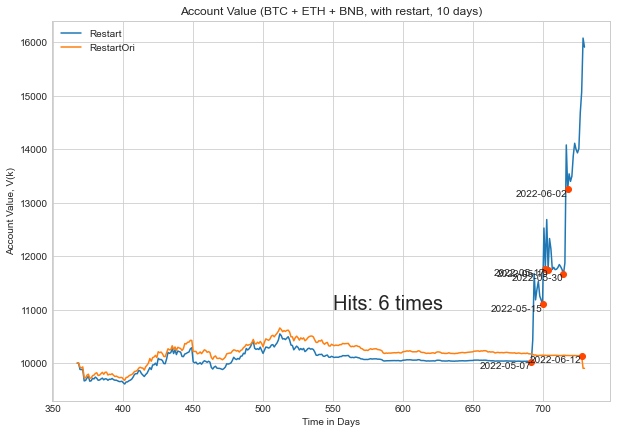

In [66]:
# Portfolio

Vk_data_re_5 = pd.DataFrame()
Vk_data_re_5 = Vk_data_re_5.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_5 = Vk_data_re_5.assign(Restart = V_all5)

print(Vk_data_re_5.head(10))
print(Vk_data_re_5.tail(10))

print('最後一天的帳戶餘額:', V_all5[-1])
return_10 = (V_all5[-1]-V_start) / V_start
print('Return:', return_10)
sd_10 = float(Vk_data_re_5['Restart'].std())
print('SD:', sd_10)
print('Sharpe Ratio:', (return_10/sd_10) * math.sqrt(Y2))

Vk_data_re_5['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, 10 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits5)) + ' times'
plt.text(550, 11000, a, fontsize = 20)

for a in hits5:
    hits5_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits5_day_index = hits5_day_index_l[0]
    plt.text(hits5_day_index, Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits5_day_index, Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_10d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_10d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [67]:
for a in hits5:
    hits5_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits5_day_index = hits5_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|

2022-05-15
-7 11096.15|-6 11097.15|-5 11098.15|-4 11099.15|-3 11100.15|-2 11101.15|-1 11102.15|0 11103.15|1 11104.15|2 11105.15|3 11106.15|4 11107.15|5 11108.15|6 11109.15|7 11110.15|

2022-05-17
-7 11757.4|-6 11758.4|-5 11759.4|-4 11760.4|-3 11761.4|-2 11762.4|-1 11763.4|0 11764.4|1 11765.4|2 11766.4|3 11767.4|4 11768.4|5 11769.4|6 11770.4|7 11771.4|

2022-05-19
-7 11741.62|-6 11742.62|-5 11743.62|-4 11744.62|-3 11745.62|-2 11746.62|-1 11747.62|0 11748.62|1 11749.62|2 11750.62|3 11751.62|4 11752.62|5 11753.62|6 11754.62|7 11755.62|

2022-05-30
-7 11659.12|-6 11660.12|-5 11661.12|-4 11662.12|-3 11663.12|-2 11664.12|-1 11665.12|0 11666.12|1 11667.12|2 11668.12|3 11669.12|4 11670.12|5 11671.12|6 11672.12|7 11673.12|

2022-06-02
-7 13245.4|-6 13246.4|-5 13247.4|-4 13248.4|-3 13249.4|-2 13250.4|-1 13251.4|0 

In [68]:
# Portfolio

delta = 7  # 7 days
c = 0
V_start = 10000
V_all6 = [V_start]
hits6 = ['2021-06-16']
d_list6 = [0]
ep = 0.001
max_d = 0.05

while len(V_all6) < Y2:  # 前提 Y2 == Y22!!
    hits6_last_index = (Prices_reset.index[Prices_reset['Date'] == hits6[-1]]).tolist()
    hits6_last_delta_index = [i-delta for i in hits6_last_index]
    H1 = str(Prices_reset['Date'][hits6_last_delta_index[0]])[:10]
    print(H1, hits6[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
        ri_3 = gamma_star3
    else:
        ri_1 = GetGammaP(H1, hits6[-1], max_d, V_all6[-1])[1]
        ri_2 = GetGammaP(H1, hits6[-1], max_d, V_all6[-1])[3]
        ri_3 = GetGammaP(H1, hits6[-1], max_d, V_all6[-1])[5]
    print('gammas:', ri_1, ri_2, ri_3)
    
    Vi_list, hit, di_list = RestartP(hits6[-1], '2022-06-14', ri_1, ri_2, ri_3, max_d, ep, V_all6[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all6 += Vi_list[1:]
    d_list6 += di_list[1:]
    print('最大跌幅:', max(d_list6), d_list6.index(max(d_list6)))
    print('帳戶餘額:', V_all6[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits6.append(hittime)
    c += 1
    print(c)

hits6 = hits6[1:]
print(len(V_all6))
print('撞到限制的期數:', hits6)

2021-06-09 2021-06-16
gammas: 3.4308104946548212 -0.5065774806067247 1.2634887114285251
最大跌幅: [0.04894752] 324
帳戶餘額: [10029.19191983]
2022-05-07
1
2022-04-30 2022-05-07


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_18060/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -6.231176099621415 -14.784286227749384 -12.44849362643094
最大跌幅: [0.04894752] 324
帳戶餘額: [11880.07507193]
2022-05-10
2
2022-05-03 2022-05-10
gammas: -9.71400883226594 -9.286605613351039 -10.90770486194787
最大跌幅: [0.04894752] 324
帳戶餘額: [13397.99387364]
2022-05-13
3
2022-05-06 2022-05-13
gammas: -40.94333477160016 -8.252151890344598 -9.393891642799144
最大跌幅: [0.04894752] 324
帳戶餘額: [12369.4650949]
2022-05-14
4
2022-05-07 2022-05-14
gammas: -11.945589585476004 -7.5155311966139 -11.993241765367321
最大跌幅: [0.04894752] 324
帳戶餘額: [11507.17529307]
2022-05-15
5
2022-05-08 2022-05-15
gammas: -16.729097495569615 -5.922387779916022 -10.845912910454114
最大跌幅: [0.04894752] 324
帳戶餘額: [11463.43209085]
2022-05-19
6
2022-05-12 2022-05-19
gammas: -13.930333967311707 -17.916818354827395 7.5508579131575075
最大跌幅: [0.04894752] 324
帳戶餘額: [11494.97498366]
2022-05-30
7
2022-05-23 2022-05-30
gammas: -43.69446543585224 -12.665014607132779 -27.41727522598088
最大跌幅: [0.04894752] 324
帳戶餘額: [13469.34432343]
2022-06-0

In [69]:
for i in range(len(V_all6)):
    V_all6[i] = float(V_all6[i])
    V_all6[i] = math.floor(V_all6[i] * 10000) / 10000.0
print(V_all6[1:3], V_all6[-3: -1])

[9996.7895, 9881.8225] [15782.237, 17261.5485]


In [70]:
for i in range(len(d_list6)):
    d_list6[i] = float(d_list6[i])
print(max(d_list6), min(d_list6))

0.048947518622845104 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9996.7895
369 2021-06-18   9881.8225
370 2021-06-19   9878.5922
371 2021-06-20   9881.8280
372 2021-06-21   9667.0665
373 2021-06-22   9675.5309
374 2021-06-23   9720.3166
375 2021-06-24   9754.5897
376 2021-06-25   9661.8093
          Date     Restart
721 2022-06-05  13697.0534
722 2022-06-06  13861.3692
723 2022-06-07  14125.3060
724 2022-06-08  14078.6820
725 2022-06-09  14034.6530
726 2022-06-10  14352.3785
727 2022-06-11  15260.9556
728 2022-06-12  15782.2370
729 2022-06-13  17261.5485
730 2022-06-14  17094.3865
最後一天的帳戶餘額: 17094.3865
Return: 0.7094386500000001
SD: 1058.9600123330251
Sharpe Ratio: 0.012781622183151634


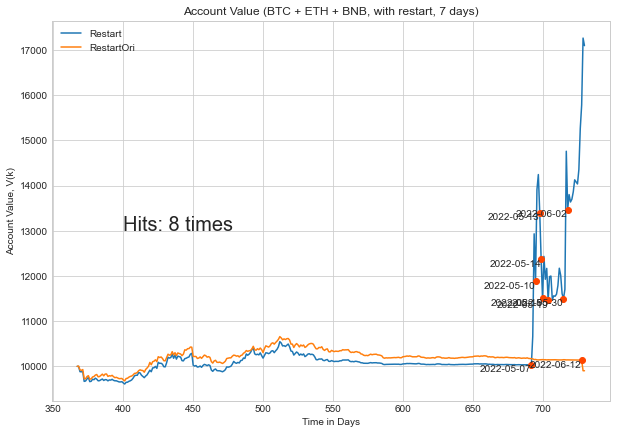

In [72]:
# Portfolio

Vk_data_re_6 = pd.DataFrame()
Vk_data_re_6 = Vk_data_re_6.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_6 = Vk_data_re_6.assign(Restart = V_all6)

print(Vk_data_re_6.head(10))
print(Vk_data_re_6.tail(10))

print('最後一天的帳戶餘額:', V_all6[-1])
return_7 = (V_all6[-1]-V_start) / V_start
print('Return:', return_7)
sd_7 = float(Vk_data_re_6['Restart'].std())
print('SD:', sd_7)
print('Sharpe Ratio:', (return_7/sd_7) * math.sqrt(Y2))

Vk_data_re_6['Restart'].plot(title = "Account Value (BTC + ETH + BNB, with restart, 7 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a6 = 'Hits: ' + str(len(hits6)) + ' times'
plt.text(400, 13000, a6, fontsize = 20)

for a in hits6:
    hits6_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits6_day_index = hits6_day_index_l[0]
    plt.text(hits6_day_index, Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits6_day_index, Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETHBNB_restart_7d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETHBNB_restart_7d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [73]:
for a in hits6:
    hits6_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits6_day_index = hits6_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-05-07
-7 10022.19|-6 10023.19|-5 10024.19|-4 10025.19|-3 10026.19|-2 10027.19|-1 10028.19|0 10029.19|1 10030.19|2 10031.19|3 10032.19|4 10033.19|5 10034.19|6 10035.19|7 10036.19|

2022-05-10
-7 11873.08|-6 11874.08|-5 11875.08|-4 11876.08|-3 11877.08|-2 11878.08|-1 11879.08|0 11880.08|1 11881.08|2 11882.08|3 11883.08|4 11884.08|5 11885.08|6 11886.08|7 11887.08|

2022-05-13
-7 13390.99|-6 13391.99|-5 13392.99|-4 13393.99|-3 13394.99|-2 13395.99|-1 13396.99|0 13397.99|1 13398.99|2 13399.99|3 13400.99|4 13401.99|5 13402.99|6 13403.99|7 13404.99|

2022-05-14
-7 12362.46|-6 12363.46|-5 12364.46|-4 12365.46|-3 12366.46|-2 12367.46|-1 12368.46|0 12369.46|1 12370.46|2 12371.46|3 12372.46|4 12373.46|5 12374.46|6 12375.46|7 12376.46|

2022-05-15
-7 11500.18|-6 11501.18|-5 11502.18|-4 11503.18|-3 11504.18|-2 11505.18|-1 11506.18|0 11507.18|1 11508.18|2 11509.18|3 11510.18|4 11511.18|5 11512.18|6 11513.18|7 11514.18|

2022-05-19
-7 11456.43|-6 11457.43|-5 11458.43|-4 11459.43|-3 11460.43|-2 1

#########################################

print((Prices.index[Prices['Date'] == hits[-1]]).tolist())

return_for_Prices.loc['2021-04-16':'2021-05-12'].max()

In [261]:
# Bitcoin

c = 0
V_start = 10000
V_all1 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all1) < Y2:
    hits_last_index = (Prices_reset.index[Prices_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        print(hits[-1])
        ri = GetGamma(H1, hits[-1], max_d, V_all1[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all1[-1])  # 索引日期.tolist()=[]問題
    V_all1 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits.append(hittime)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all1))
print('撞到限制的期數:', hits)

2021-01-15 2021-04-16
6.251440917651317
最大跌幅: 0.04056633223449135 9
2021-05-12
1
2021-02-10 2021-05-12
2021-05-12
2.9616672537638387
最大跌幅: 0.044581706053296366 280
2
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9954.871822
369 2021-04-18   9745.521273
370 2021-04-19   9732.090513
371 2021-04-20   9751.586224
372 2021-04-21   9680.096792
373 2021-04-22   9635.321764
374 2021-04-23   9624.394423
375 2021-04-24   9608.523253
376 2021-04-25   9594.336678
最後一天的帳戶餘額: 9126.47247970707
Return: -0.08735275202929296
SD: 155.55088219859027
Sharpe Ratio: -0.0005615702771635236


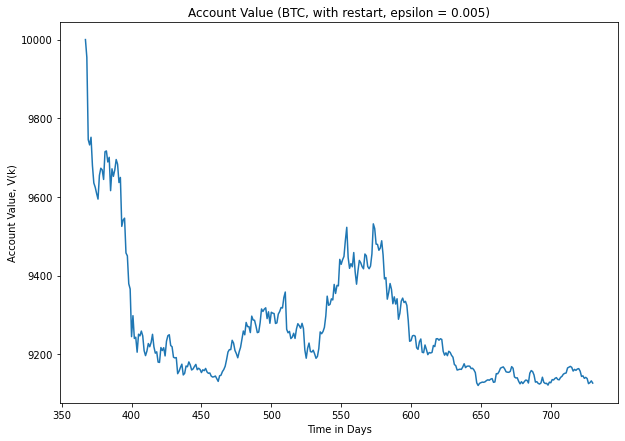

In [279]:
# Bitcoin

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

print(Vk_data_re_1.head(10))
print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', return_quarter/sd_quarter)

Vk_data_re_1['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

In [42]:
# Tether

c = 0
V_start = 10000
V_all1 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all1) < Y22:
    hits_last_index = (Prices2_reset.index[Prices2_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
#     H1 = Prices.iloc[hits_last_delta_index]['Date']
    H1 = str(Prices2_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        print(hits[-1])
        ri = GetGamma2(H1, hits[-1], max_d, V_all1[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart2(hits[-1], '2022-04-14', ri, max_d, ep, V_all1[-1])  # 索引日期.tolist()=[]問題
    V_all1 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N2:
        hittime = str(Prices2_reset['Date'][hit])[:10]
        print(hittime)
        hits.append(hittime)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all1))
print('撞到限制的期數:', hits)

2021-01-15 2021-04-16
33.07750169964984
最大跌幅: 0.02077933077311242 248
1
364
撞到限制的期數: []


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17  10151.554290
369 2021-04-18   9961.903722
370 2021-04-19   9959.391076
371 2021-04-20   9960.152961
372 2021-04-21   9960.089997
373 2021-04-22   9961.742320
374 2021-04-23   9962.499062
375 2021-04-24   9959.833675
376 2021-04-25   9960.095248
最後一天的帳戶餘額: 9950.49512347893
Return: -0.00495048765210704
SD: 11.945388782568184
Sharpe Ratio: -0.0004144266664079824


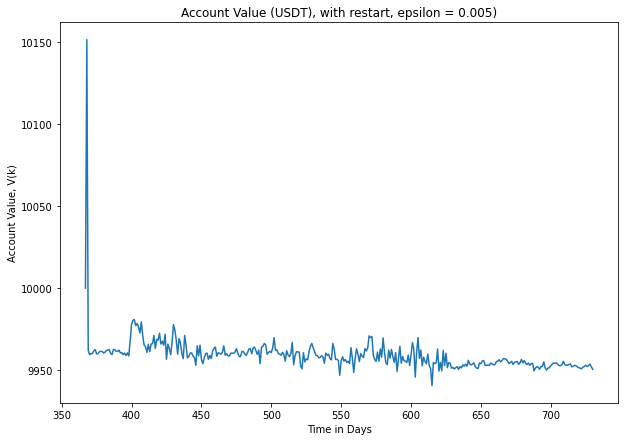

In [44]:
# 時間和帳戶餘額的關係

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices2_reset['Date'].iloc[Y2_day0_index2[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

print(Vk_data_re_1.head(10))
print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', return_quarter/sd_quarter)

Vk_data_re_1['Restart'].plot(title = "Account Value (USDT), with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_USDT_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_USDT_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

# 老方法：還沒改機率函數那邊

In [64]:
# 老方法
# J(gamma) = log[V(N)/V(0)] / N^2
# in-sample
# out-of-sample

def J(gamma):
    max_V = V_start
    Vk = V_start
    for k in range(sublen-1):
        dk = (max_V-Vk)/max_V
        Mk = (max_d-dk)/(1-dk)
        Vk1 = Vk * (1 + (gamma*Mk*float(return_for_Prices.iloc[k])))
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1
    return math.log(Vk/V_start)/(sublen**2)

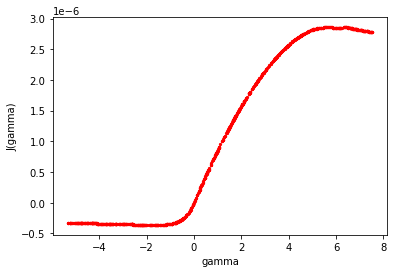

In [65]:
# 生成1000個區間內的gamma，區間來自前一年的資料

r_2_list = []
Jr_2_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)
    r_2_list.append(r)
    Jr_2_list.append(J(r))

# 製作figure  
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(r_2_list, Jr_2_list, color='red', s=5)
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")
fig = plt.gcf()
fig.savefig('gamma_2_BTC.pdf', format='pdf', dpi=1000)
fig.savefig('gamma_2_BTC.eps', format='eps', dpi=1000)
plt.show()

In [66]:
# 從模擬結果找最佳解

index_2 = Jr_2_list.index(max(Jr_2_list))
print('max J(r) =', max(Jr_2_list))
gamma_2_star = r_2_list[index_2]
print('gamma* = ', gamma_2_star)

max J(r) = 2.8582249771261637e-06
gamma* =  5.698188866339455


V_last (origin): 9500.007780310783
V_last (MC): 9500.089912509588
return (origin): -0.04999922196892167
return (MC): -0.04999100874904125


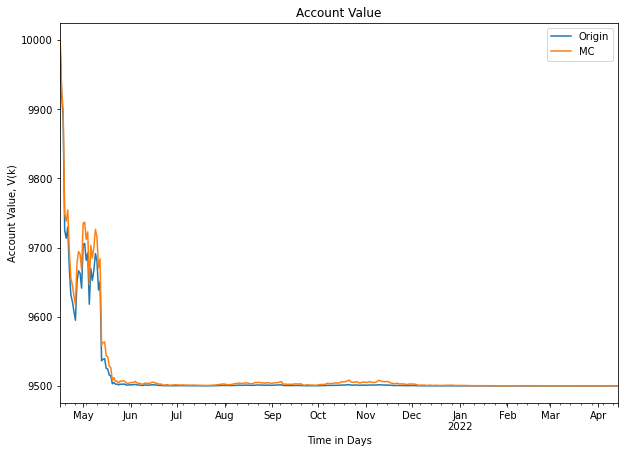

In [69]:
# Max Drawdown

Vk_2_list = [V_start]
max_2_V = V_start
Vk_2 = V_start

for k in range(N-sublen-2):
    dk = (max_2_V-Vk_2)/max_2_V
    Mk_2 = (max_d-dk)/(1-dk)
    Vk1_2 = Vk_2 * (1 + (gamma_2_star*Mk_2*float(return_for_Prices.iloc[k+sublen])))
    Vk_2_list.append(Vk1_2)
    if Vk1_2 >= max_2_V:
        max_2_V = Vk1_2
    Vk_2 = Vk1_2

# gamma from MC

Vk_3_list = [V_start]
max_3_V = V_start
Vk_3 = V_start

for k in range(N-sublen-2):
    dk = (max_3_V-Vk_3)/max_3_V
    Mk_3 = (max_d-dk)/(1-dk)
    Vk1_3 = Vk_3 * (1 + (gamma_star*Mk_3*float(return_for_Prices.iloc[k+sublen])))
    Vk_3_list.append(Vk1_3)
    if Vk1_3 >= max_3_V:
        max_3_V = Vk1_3
    Vk_3 = Vk1_3

# 時間和帳戶餘額的關係

Vk_2_data = pd.DataFrame.copy(Prices.loc['2021-04-16':'2022-04-15'])
Vk_2_data = Vk_2_data.assign(Origin = Vk_2_list)
Vk_2_data = Vk_2_data.assign(MC = Vk_3_list)
Vk_2_data = Vk_2_data.drop('Adj Close', axis=1)

print('V_last (origin):', Vk_2_list[-1])
print('V_last (MC):', Vk_3_list[-1])

return_2_DD = (Vk_2_list[-1]-V_start)/V_start
return_3_DD = (Vk_3_list[-1]-V_start)/V_start
print('return (origin):', return_2_DD)
print('return (MC):', return_3_DD)

Vk_2_data.plot(title = "Account Value")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_2_BTC.pdf', format='pdf', dpi=1000)
fig.savefig('DD_2_BTC.eps', format='eps', dpi=1000)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Avg return: 0.4958213969184366


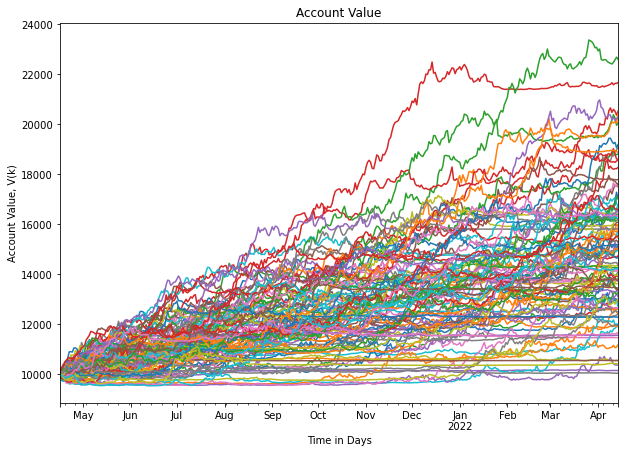

In [71]:
# Max Drawdown (gamma_2_star)

Vk_data_o = pd.DataFrame.copy(Prices.loc['2021-04-16':'2022-04-15'])
column_names = []
Vks = 0
V_start = 10000
stimu_pre = 100
for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub 
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re = (S1-S0_pred) / S0_pred  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_2_star*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred = S1  # update the stock price
    Vks += Vk
    Vk_data_o.insert(i+1, column_names[-1], Vk_list) 

Vk_data_o = Vk_data_o.drop('Adj Close', axis=1)
print('Avg return:', (Vks/stimu_pre - V_start) / V_start)

Vk_data_o.plot(title = "Account Value", legend=None)
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_100_o.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_100_o.eps', format='eps', dpi=1000)
plt.show()

# delta改成其他長度

In [233]:
# 改成restart日和前t1日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.1

delta = int(Y2 / 2)  # 自訂為一季


# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.05711000322940835
gamma* =  5.158572826913716


In [234]:
c = 0
V_start = 10000
V_all2 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all2) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all2[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all2[-1])  # 索引日期.tolist()=[]問題
    V_all2 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        #print('h', hittime)
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all2))
print('撞到限制的期數:', hits)

2020-10-16 2021-04-16
5.158572826913716
最大跌幅: 0.09421906482007507 32
hitlist ['2021-04-16', '2021-05-19']
1
2020-11-18 2021-05-19
3.449343762245155
最大跌幅: 0.09421906482007507 32
2
364
撞到限制的期數: ['2021-05-19']


          Date
367 2021-04-16
368 2021-04-17
369 2021-04-18
370 2021-04-19
371 2021-04-20
..         ...
726 2022-04-10
727 2022-04-11
728 2022-04-12
729 2022-04-13
730 2022-04-14

[364 rows x 1 columns]
          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9925.522132
369 2021-04-18   9574.025383
370 2021-04-19   9548.113917
371 2021-04-20   9586.106773
372 2021-04-21   9448.676894
373 2021-04-22   9356.629175
374 2021-04-23   9332.865524
375 2021-04-24   9297.820507
376 2021-04-25   9265.694349
最後一天的帳戶餘額: 9008.890356350363
最後一天和第一天相比的報酬率: -0.09911096436496374


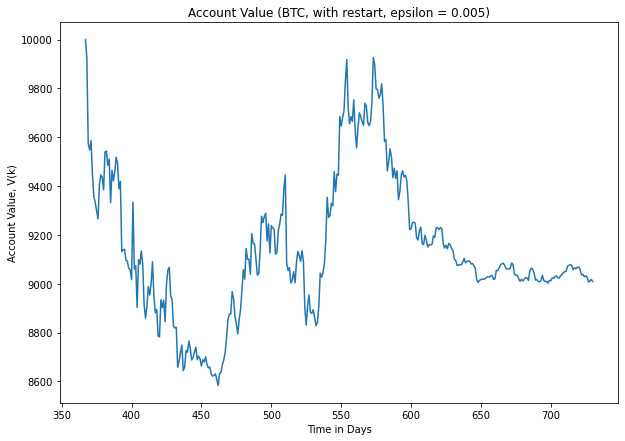

In [235]:
# 時間和帳戶餘額的關係

Vk_data_re = pd.DataFrame()
Vk_data_re = Vk_data_re.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re = Vk_data_re.assign(Restart = V_all2)

print(Vk_data_re.head(10))
print('最後一天的帳戶餘額:', V_all2[-1])
return_DD_re = (V_all2[-1]-V_start) / V_start
print('最後一天和第一天相比的報酬率:', return_DD_re)

Vk_data_re['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_halfyear_0.1.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_halfyear_0.1.eps', format='eps', dpi=1000)
plt.show()

In [250]:
# 改成restart日和前半年算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 2)  # 半年

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.05914941366710869
gamma* =  6.035593898192838


In [251]:
c = 0
V_start = 10000
V_all2 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all2) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all2[-1])[1]
    print(ri)  # 這輪使用的gamma*
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all2[-1])  # 索引日期.tolist()=[]問題
    V_all2 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        #print('h', hittime)
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all2))
print('撞到限制的期數:', hits)

2020-10-16 2021-04-16
6.035593898192838
最大跌幅: 0.039882629008463115 9
hitlist ['2021-04-16', '2021-05-12']
1
2020-11-11 2021-05-12
7.107797754584924
最大跌幅: 0.039882629008463115 9
hitlist ['2021-04-16', '2021-05-12', '2021-05-19']
2
2020-11-18 2021-05-19
3.826804532035146
最大跌幅: 0.044582720398752544 264
hitlist ['2021-04-16', '2021-05-12', '2021-05-19', '2022-01-20']
3
2021-07-22 2022-01-20
2.144941102144779
最大跌幅: 0.044582720398752544 264
4
364
撞到限制的期數: ['2021-05-12', '2021-05-19', '2022-01-20']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9956.429988
369 2021-04-18   9753.615433
370 2021-04-19   9740.220917
371 2021-04-20   9759.702865
372 2021-04-21   9688.455040
373 2021-04-22   9643.219735
374 2021-04-23   9632.053941
375 2021-04-24   9615.787248
376 2021-04-25   9601.173710
最後一天的帳戶餘額: 9025.309726274943
Return: -0.09746902737250566
SD: 202.60189237165523
Sharpe Ratio: -0.00048108646089893066


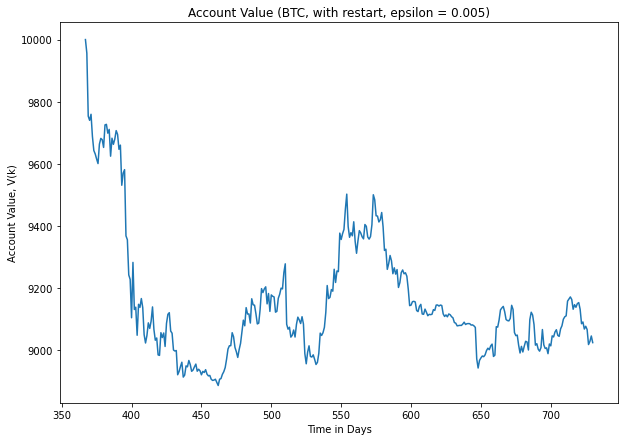

In [252]:
# 時間和帳戶餘額的關係

Vk_data_re_2 = pd.DataFrame()
Vk_data_re_2 = Vk_data_re_2.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_2 = Vk_data_re_2.assign(Restart = V_all2)

print(Vk_data_re_2.head(10))
print('最後一天的帳戶餘額:', V_all2[-1])
return_half = (V_all2[-1]-V_start) / V_start
print('Return:', return_half)
sd_half = float(Vk_data_re_2['Restart'].std())
print('SD:', sd_half)
print('Sharpe Ratio:', return_half/sd_half)

Vk_data_re_2['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_halfyear_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_halfyear_0.05.eps', format='eps', dpi=1000)
plt.show()

In [293]:
# 改成restart日和前30日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = int(Y2 / 12)  # 自訂為一季


# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.06037824230945982
gamma* =  5.8468355055813


In [294]:
c = 0
V_start = 10000
V_all3 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all3) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all3[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all3[-1])  # 索引日期.tolist()=[]問題
    V_all3 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all3))
print('撞到限制的期數:', hits)

2021-03-17 2021-04-16
5.8468355055813
最大跌幅: 0.039254941292305924 9
hitlist ['2021-04-16', '2021-05-12']
1
2021-04-12 2021-05-12
-0.7197551046046513
最大跌幅: 0.039254941292305924 9
2
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9957.792605
369 2021-04-18   9760.734371
370 2021-04-19   9747.394535
371 2021-04-20   9766.830787
372 2021-04-21   9695.916838
373 2021-04-22   9650.361173
374 2021-04-23   9639.005227
375 2021-04-24   9622.417766
376 2021-04-25   9607.450587
最後一天的帳戶餘額: 9503.098340050818
最後一天和第一天相比的報酬率: -0.049690165994918246


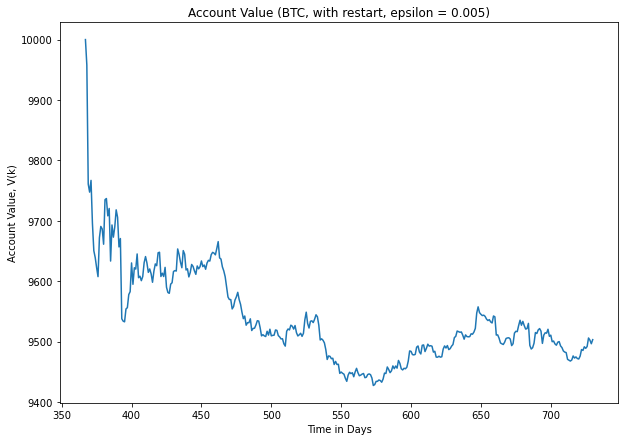

In [295]:
# 時間和帳戶餘額的關係

Vk_data_re = pd.DataFrame()
Vk_data_re = Vk_data_re.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re = Vk_data_re.assign(Restart = V_all3)

print(Vk_data_re.head(10))
print('最後一天的帳戶餘額:', V_all3[-1])
return_DD_re = (V_all3[-1]-V_start) / V_start
print('最後一天和第一天相比的報酬率:', return_DD_re)

Vk_data_re['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_month_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_month_0.05.eps', format='eps', dpi=1000)
plt.show()

In [299]:
return_month = (V_all3[-1]-V_start) / V_start
print('Return:', return_month)
sd_month = float(Vk_data_re['Restart'].std())
print('SD:', sd_month)
print('Sharpe Ratio:', return_month/sd_month)

Return: -0.049690165994918246
SD: 78.245755643253
Sharpe Ratio: -0.0006350525416544167


In [290]:
# 改成restart日和前14日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 14  # 自訂為兩週

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.059680352611298434
gamma* =  6.734027360927913


In [291]:
c = 0
V_start = 10000
V_all14 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all14) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all14[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all14[-1])  # 索引日期.tolist()=[]問題
    V_all14 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all14))
print('撞到限制的期數:', hits)

2021-04-02 2021-04-16
6.734027360927913
最大跌幅: 0.04197017802770697 9
393
hitlist ['2021-04-16', '2021-05-12']
1
2021-04-28 2021-05-12
2.806912157021017
最大跌幅: 0.04360979146319868 280
0
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9951.388105
369 2021-04-18   9727.603645
370 2021-04-19   9714.191896
371 2021-04-20   9733.573042
372 2021-04-21   9662.078572
373 2021-04-22   9618.672525
374 2021-04-23   9608.349861
375 2021-04-24   9593.458612
376 2021-04-25   9580.298220
最後一天的帳戶餘額: 9145.348322962815
Return: -0.08546516770371855
SD: 150.13961586959613
Sharpe Ratio: -0.0005692379536787239


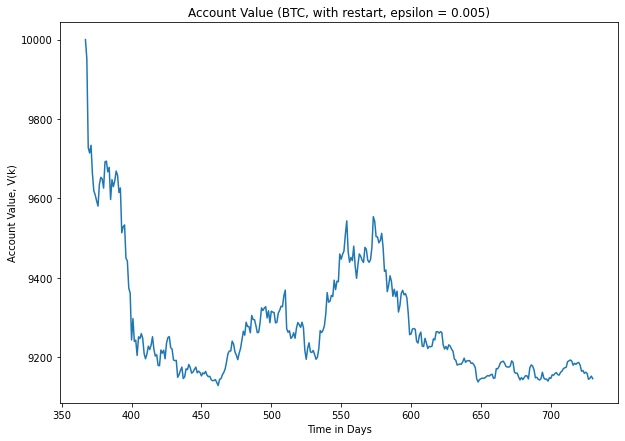

In [292]:
# 時間和帳戶餘額的關係

Vk_data_re_14 = pd.DataFrame()
Vk_data_re_14 = Vk_data_re_14.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_14 = Vk_data_re_14.assign(Restart = V_all14)

print(Vk_data_re_14.head(10))
print('最後一天的帳戶餘額:', V_all14[-1])
return_14 = (V_all14[-1]-V_start) / V_start
print('Return:', return_14)
sd_14 = float(Vk_data_re_14['Restart'].std())
print('SD:', sd_14)
print('Sharpe Ratio:', return_14/sd_14)

Vk_data_re_14['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_14days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_14days_0.05.eps', format='eps', dpi=1000)
plt.show()

In [296]:
# 改成restart日和前14日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 10  # 自訂為兩週

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.24505925219002198
gamma* =  7.510148385421546


In [297]:
c = 0
V_start = 10000
V_all10 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all10) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all14[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all10[-1])  # 索引日期.tolist()=[]問題
    V_all10 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all10))
print('撞到限制的期數:', hits)

2021-04-06 2021-04-16
7.510148385421546
最大跌幅: 0.04389697974093397 9
393
hitlist ['2021-04-16', '2021-05-12']
1
2021-05-02 2021-05-12
-9.736854691057761
最大跌幅: 0.04389697974093397 9
401
hitlist ['2021-04-16', '2021-05-12', '2021-05-20']
2
2021-05-10 2021-05-20


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:23: RuntimeWarning: overflow encountered in double_scalars
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Mk = (max_d-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dk = (max_V-Vk) / max_V
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:21: RuntimeWarning: overflow encountered in double_scalars
  dk = (max_V-Vk) / max_V


-43.630188432121514
最大跌幅: 0.314328713242349 37
407
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26']
3
2021-05-16 2021-05-26
-3.452622347999495
最大跌幅: 0.314328713242349 37
493
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20']
4
2021-08-10 2021-08-20
31.01131299882983
最大跌幅: 0.314328713242349 37
499
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26']
5
2021-08-16 2021-08-26
25.269263772422057
最大跌幅: 0.314328713242349 37
503
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30']
6
2021-08-20 2021-08-30
5.145100549761832
最大跌幅: 0.314328713242349 37
605
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30', '2021-12-10']
7
2021-11-30 2021-12-10
-11.433331735981707
最大跌幅: 0.314328713242349 37
663
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30', '2021-12

          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9945.785408
369 2021-04-18   9699.306759
370 2021-04-19   9686.208853
371 2021-04-20   9704.999875
372 2021-04-21   9635.019386
373 2021-04-22   9594.692526
374 2021-04-23   9585.506431
375 2021-04-24   9572.400279
376 2021-04-25   9561.030203
最後一天的帳戶餘額: 11602.43740417668
Return: 0.16024374041766806
SD: 852.1189643479521
Sharpe Ratio: 0.00018805324974815904


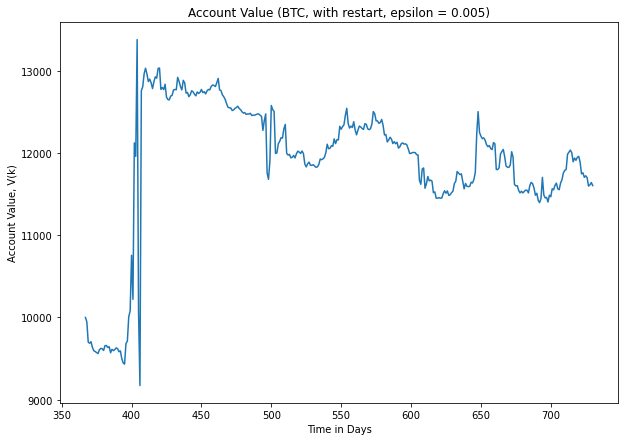

In [298]:
# 時間和帳戶餘額的關係

Vk_data_re_10 = pd.DataFrame()
Vk_data_re_10 = Vk_data_re_10.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_10 = Vk_data_re_10.assign(Restart = V_all10)

print(Vk_data_re_10.head(10))
print('最後一天的帳戶餘額:', V_all10[-1])
return_10 = (V_all10[-1]-V_start) / V_start
print('Return:', return_10)
sd_10 = float(Vk_data_re_10['Restart'].std())
print('SD:', sd_10)
print('Sharpe Ratio:', return_10/sd_10)

Vk_data_re_10['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_10days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_10days_0.05.eps', format='eps', dpi=1000)
plt.show()

In [45]:
# Tether
# 改成restart日和前7日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 7  # 自訂為 7 days

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.0008755235480688508
gamma* =  42.06418981684346


In [46]:
c = 0
V_start = 10000
V_all7 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all7) < Y22:
    hits_last_index = (Prices2_reset.index[Prices2_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices2_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma2(H1, hits[-1], max_d, V_all7[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart2(hits[-1], '2022-04-14', ri, max_d, ep, V_all7[-1])  # 索引日期.tolist()=[]問題
    V_all7 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N2:
        hittime = str(Prices2_reset['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all7))
print('撞到限制的期數:', hits)

2021-04-09 2021-04-16
42.06418981684346
最大跌幅: 0.026243073099483965 248
0
364
撞到限制的期數: []


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17  10192.729441
369 2021-04-18   9950.575284
370 2021-04-19   9947.886978
371 2021-04-20   9948.700362
372 2021-04-21   9948.633098
373 2021-04-22   9950.398169
374 2021-04-23   9951.207689
375 2021-04-24   9948.354565
376 2021-04-25   9948.633920
最後一天的帳戶餘額: 9935.056678664283
Return: -0.006494332133571697
SD: 15.138560737645493
Sharpe Ratio: -0.0004289927058536057


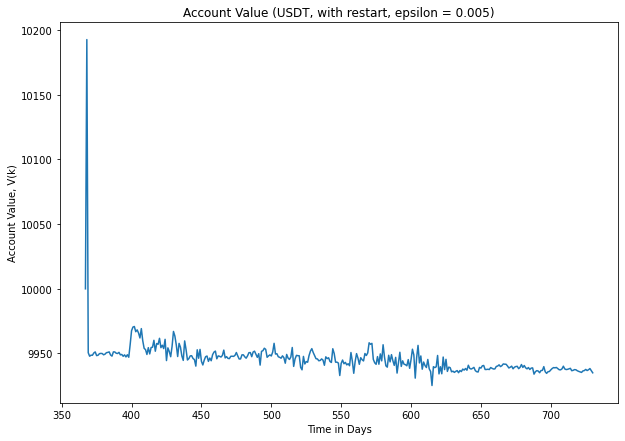

In [47]:
# 時間和帳戶餘額的關係

Vk_data_re_7 = pd.DataFrame()
Vk_data_re_7 = Vk_data_re_7.assign(Date = Prices2_reset['Date'].iloc[Y2_day0_index2[0]:])
Vk_data_re_7 = Vk_data_re_7.assign(Restart = V_all7)

print(Vk_data_re_7.head(10))
print('最後一天的帳戶餘額:', V_all7[-1])
return_7 = (V_all7[-1]-V_start) / V_start
print('Return:', return_7)
sd_7 = float(Vk_data_re_7['Restart'].std())
print('SD:', sd_7)
print('Sharpe Ratio:', return_7/sd_7)

Vk_data_re_7['Restart'].plot(title = "Account Value (USDT, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_USDT_restart_7days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_USDT_restart_7days_0.05.eps', format='eps', dpi=1000)
plt.show()

# 回測天數vs報酬率

In [ ]:
data = [3,4,2,3,4,5,4,7,8,5,4,6,2,1,0,9,7,6,6,5,4]
n, bins, patches=plt.hist(data,bins=20)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram with 20 bins")
plt.show()